In [3]:
import socket
import os
import time
import urllib.request, urllib.parse, urllib.error
import re
from bs4 import BeautifulSoup
import ssl
import requests
import re

In [4]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')

In [1]:
#setup key
key = "d17b30b16180424f8a95060b534aa726"
rl = 'http://api.nytimes.com/svc/archive/v1/{}/{}.json?api-key={}' 
#choose the year and month
url = rl.format(2016,7,key)

In [5]:
#get content from the link,
r = requests.get(url)
article = r.json()

In [256]:
article_rp = article['response']

In [257]:
#retrieve links and ids for all the articles
url_0716 = []
url_0716t = []
for i in article_rp['docs']:
    if i['document_type'] == 'article':
        url_0716.append(i['web_url'])
        url_0716t.append(i['_id'])

In [258]:
len(url_0716),len(url_0716t)

(5175, 5175)

In [246]:
#save all keys
f = open("key_201607.txt", "a")
for i in url_0716t:
    f.write(i+'\n')
f.close()   

In [261]:
#since links starts with query.nytimes do not contain articles, if necessary, drop them
n_match = []
for i in range(len( url_0716)):
    t = len(re.findall('https://query.nytimes.com', url_0716[i]))
    if t>0:
        n_match.append(i)

In [264]:
len(n_match)

549

In [265]:
#save positions for non-articles
f = open('missing_201607.txt','a')
for i in n_match:
    f.write('%d ' %i)
f.close()

In [212]:
#ignore SSL certificate errors
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

n_match = []
f = open("article_201607.txt", "a")
a_10 = ''
for j in range(5170,5175):
    #ignore all non-articles
    t = len(re.findall('https://query.nytimes.com', url_0716[j]))
    if t>0:
        n_match.append(j)
        continue
    
    html = urllib.request.urlopen(url_0716[j],context = ctx).read()
    soup = BeautifulSoup(html,'html.parser')
    time.sleep(0.5)
    target = soup.findAll('p', class_=['story-body-text', 'story-content'])
    a1 = ''
    for i in target:
        s = ''.join(str(ii) for ii in i)
        a1 = a1+s+'\n'
    a_10 = a_10 +'%d '%(j+1)+soup.title.string+'\n'+url_0716t[j]+'\n' + a1 + '************\n'
    #print(j)
    if (j+1) % 10 == 0:
        print(j+1)
        f.write(a_10)
        a_10 = ''
#f.write(a_10)
f.close()

5170
5171
5172
5173
5174


## Simple Summary

In [275]:
arti_tm = {'0716':7159,'0816':20659,'0916':15399,'1016':18152,'1116':5511,'1216':5247,'0117':5213,'0217':5089,'0317':5706,'0417':5064,'0517':5529,'0617':5366}

In [276]:
arti_gm = {'0716':5175,'0816':4482,'0916':4952,'1016':5218,'1116':4830,'1216':4508,'0117':4587,'0217':4332,'0317':5088,'0417':4581,'0517':4881,'0617':4881}

In [306]:
x1,y1 = zip(*arti_gm.items())

In [304]:
x,y = zip(*arti_tm.items())

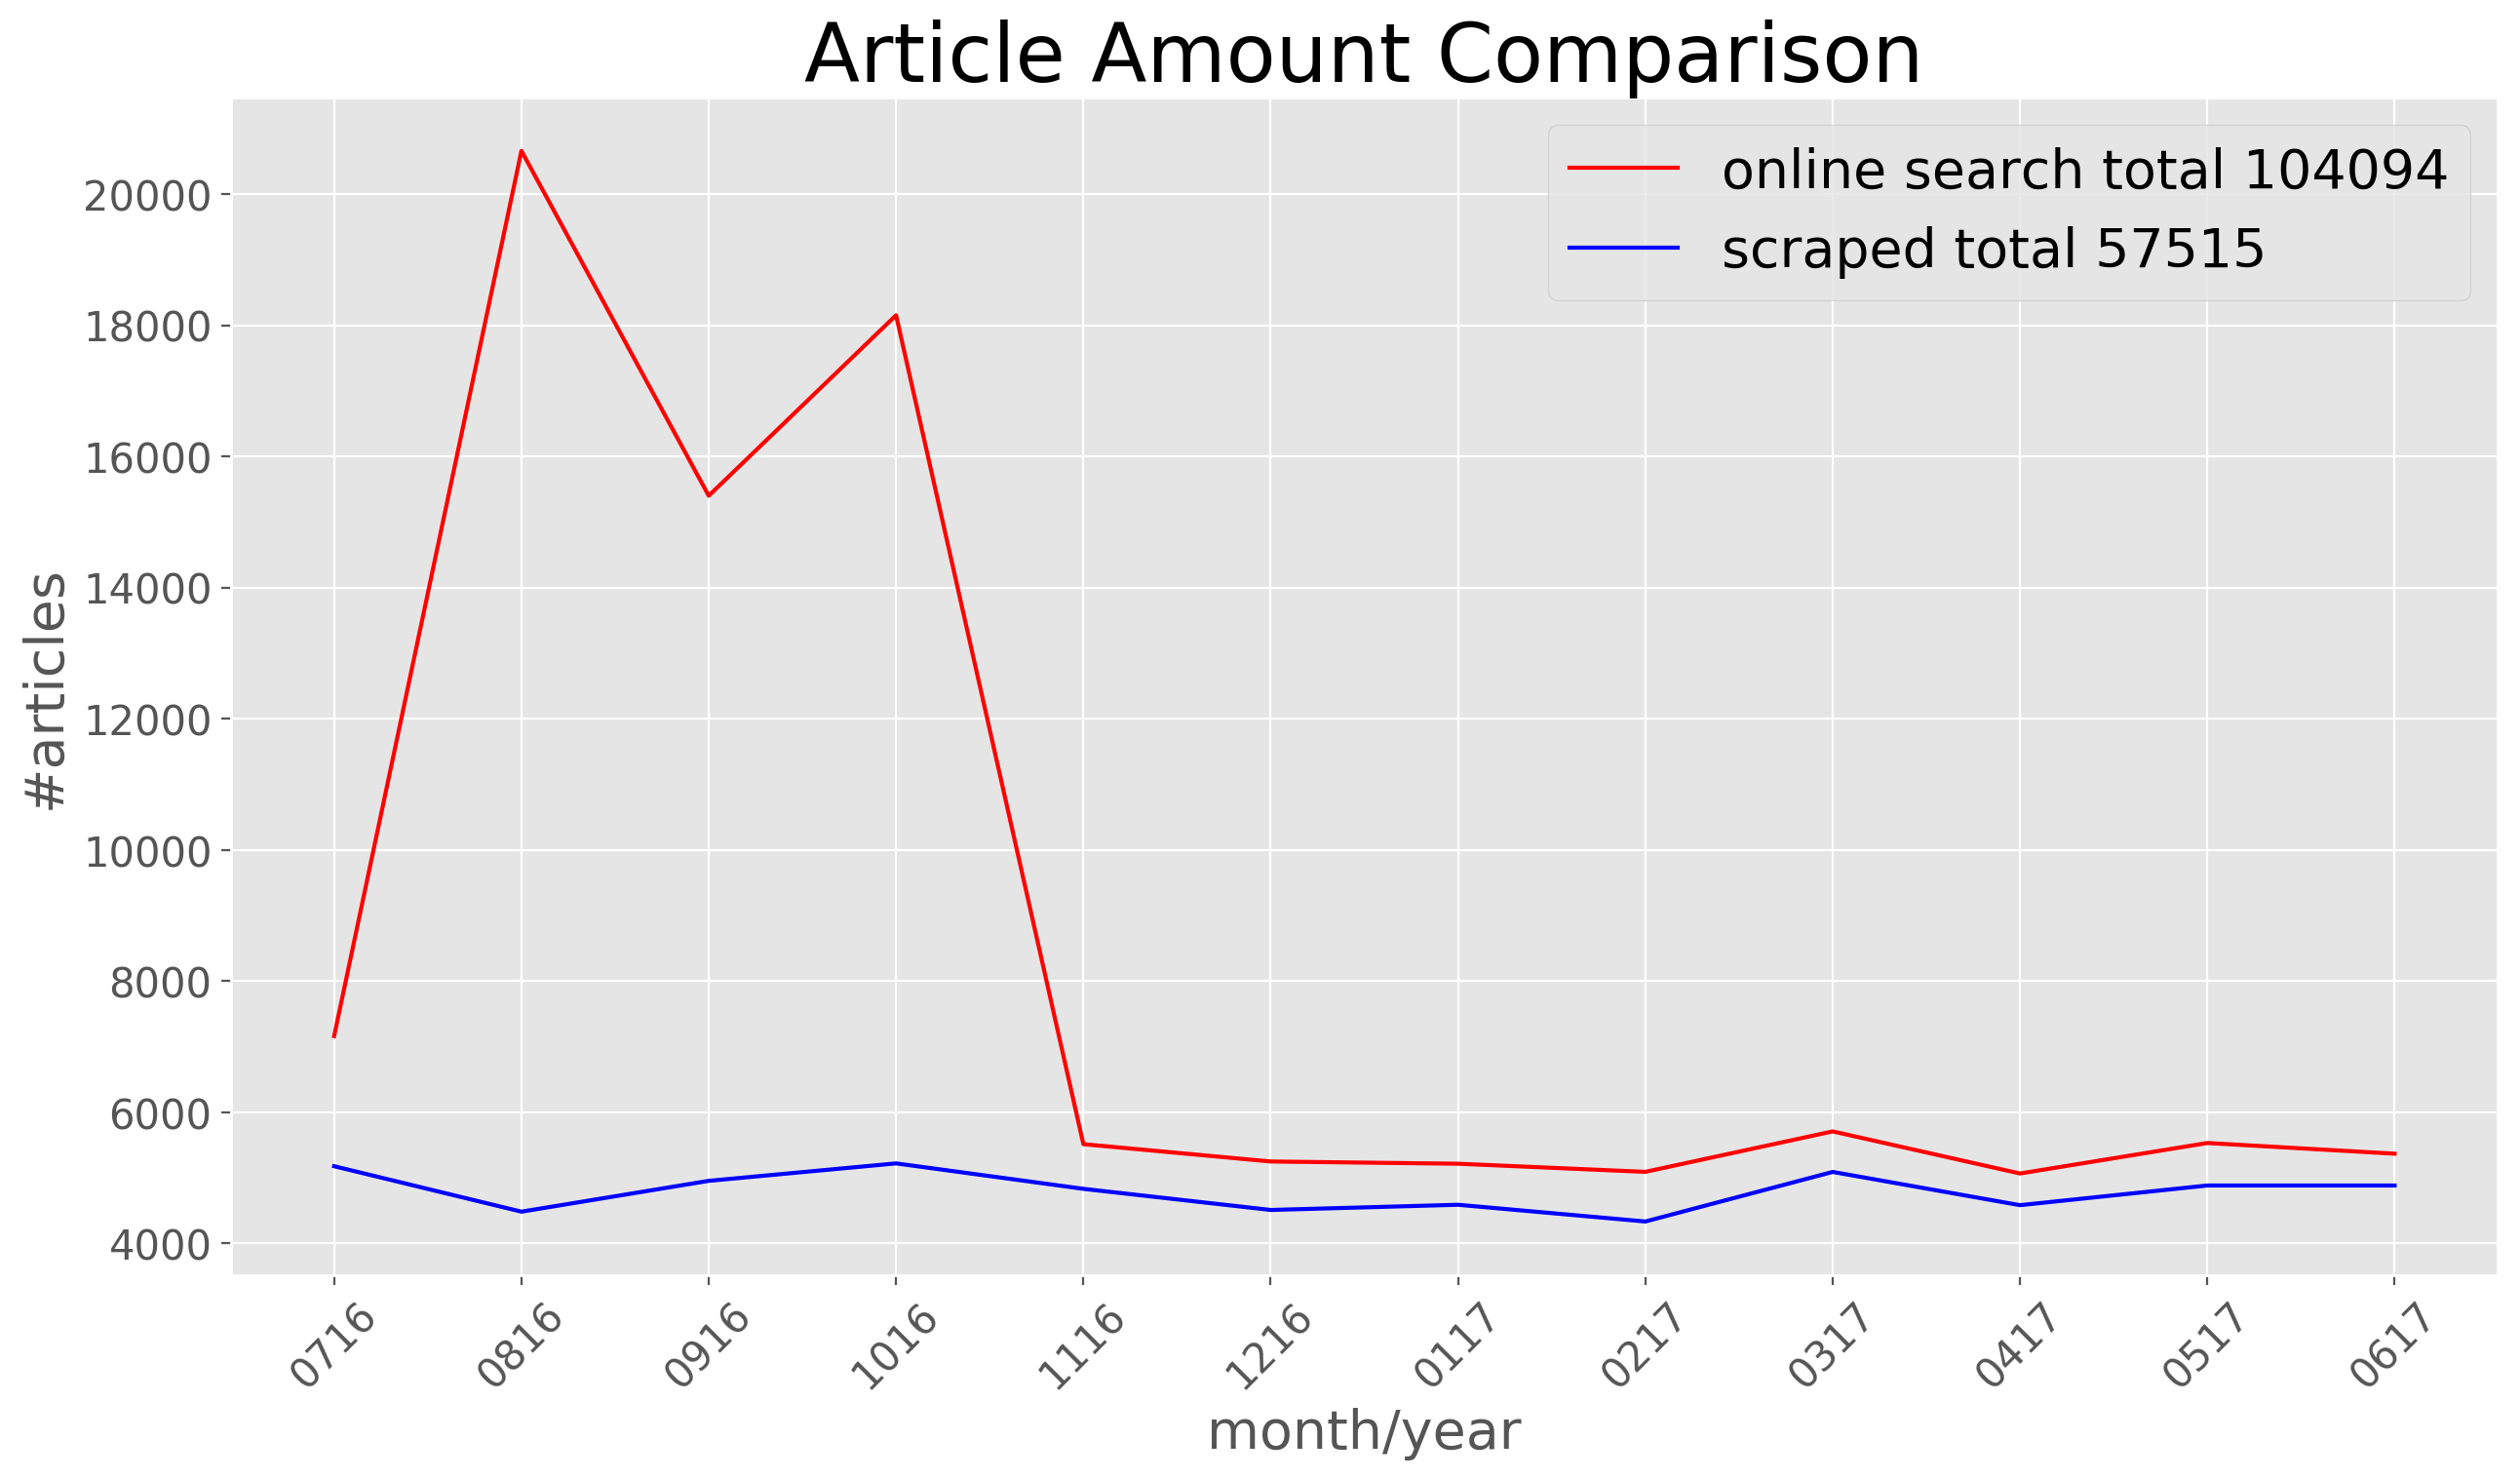

In [364]:
fig=plt.figure(figsize=(15, 8), dpi= 200, facecolor='w', edgecolor='k')


plt.plot(list(range(1,13)),y,'r',label = 'online search total %d' %sum(y))
plt.plot(list(range(1,13)),y1,'b',label ='scraped total %d'%sum(y1))
plt.xlabel('month/year',fontsize=20)
plt.ylabel('#articles',fontsize=20)
plt.title('Article Amount Comparison',fontsize=30)
plt.legend(loc='best',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(np.arange(1, 13, 1.0),x,rotation=45,fontsize=15)
plt.show()

In [341]:
#sometimes link set may contain links not for an article
f = open('/Users/zhanghengqian/Dropbox/Duke/fall-2017/IDS/nytimes_keys/missing_201607.txt','r')
s = f.read()
f.close()

In [343]:
len(s.split())

549